# 3.7.1: Baseball  (Vectors)

---

<br>

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

As the course has developed, we have moved closer and closer to realistic models of the physical world.  In this notebook, we're going to creep even closer: by including a second dimension in our model!

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/third_dimension.PNG width = 400>
</center>

<br>

We'll look at the flight of a baseball including the effect
of air resistance, and later incorporate that into an optimization problem.  Before we do that, though, we need to understand how to track an object in two dimensions.  We need to understand vectors.

## Vectors

Broadly defined, a vector represents any quantity whose expression requires more than one value. In physics and engineering, a vector is most often a variable that is defined by both a magnitude and a direction.  We will use vectors to represent positions, velocities, accelerations, and forces in two dimensions.  The "opposite" of a vector is a *scalar*, which is a quanity that can be defined with a single value (like mass, density, etc...).

### Working with vector components

A vector for a multidimensional quanity like velocity or force can be represented in two ways: as a magnitude and direction, or as a pair of components.  The vector arrow in this image, could be fully defined either by defining the length of the vector $A$ and the angle $\theta _A$, $or$ by defining the x- and y-*components*, denoted here by $A.x$ and $A.y$:

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/vector_mag.png width = 400>

<br>

We tend to think of vectors in terms of angles and length, but vector math is generally easier using the components, which allow us to work in Cartesian coordinates rather than polar coordinates.  So when we create a vector in Python, we'll use Series to store the components of the vector, and then "translate" to angles and magnitudes when necessary.  

<br>

So the following vector A represents a point 5 units to the right (or east) and 2 units up (or north) from an implicit origin:

In [6]:
import pandas as pd
A = pd.Series(dict(x=5.0,y=2.0), dtype=float)
A

x    5.0
y    2.0
dtype: float64

As with any `Series`, you can access the components of a vector by name using the dot
operator, or by using using their index in brackets:

In [7]:
print(A.x, A[0], A.y, A[1])

5.0 5.0 2.0 2.0


It is useful that Series objects support most mathematical operations, including
addition and subtraction.  The mathematical rules for vectors are quite similar to those for scalars.

In [8]:
B = pd.Series(dict(x=2.0,y=3.0), dtype=float)
R = A + B
R

x    7.0
y    5.0
dtype: float64

Adding two vectors means that we are putting them head to tail, and finding the vector that goes from the beginning point of the first vector to the end point of the second vector.  This image displays graphically the addition problem that we just completed computationally:

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/vector.PNG width = 400>




---

<br>

🟨 🟨 Active reading: Multiple choice


In [9]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_7_2D',home,0)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


What is the difference between a vector expressed using components and one expressed using an angle and a length?

A) To express velocity and position, you should only use a component vector
B) To express velocity and position, you should only use an angle/ length vector
C) You should only use an angle/ length vector when something is going in a circle
D) They are just two ways of describing the same thing and can be used interchangeably


---

### Working with vector angles

We can specify a vector with coordinates `x` and `y`, as in the previous examples.  Often, though, we want to specify a vector with a magnitude and angle.  *Magnitude* is the length of the vector: if the vector represents a position, magnitude is its distance from the origin; if it represents a velocity, magnitude is its speed.

<br>

We want to be able to "translate" a component expression of a vector to a magnitude-angle expression. To find a magnitude, we use the Pythagorean theorem in the following form:

$$A_{mag} = \sqrt{A_x^2 + A_y^2}$$

In [10]:
import numpy as np
mag = np.sqrt(A.x**2 + A.y**2)
mag

5.385164807134504

To find the direction of a vector, expressed as an angle $\theta$ in radians from the positive $x$ axis, we need to use trigonometry.  If you remember "SOH CAH TOA" from trigonometry, you know that "TOA" represents $tan ~ \theta = \frac{opposite}{adjacent}$.  

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/vector_mag.png width = 400>

<br>

Since we know the two sides of the triangle, we can use this equation to find $\theta$:

<br>

$$\theta = tan^{-1} \frac{y}{x}$$

<br>


The *inverse tangent* is sometimes denoted as *arctan*, which explains the name of this NumPy function:

In [11]:
theta = np.arctan2(A.y, A.x)
theta

0.3805063771123649

The result from here is in radians.  Most Python functions, like `sin` and `cos`, work with radians.  Many people find it more natural to work with degrees, and NumPy provides another function to convert radians to degrees:

In [12]:
angle = np.rad2deg(theta)
angle

21.80140948635181

And a function to convert degrees to radians:

In [13]:
theta = np.deg2rad(angle)
theta

0.3805063771123649

To avoid confusion, we'll use the variable name `angle` for a value in degrees and `theta` for a value in radians.

<br>

We can also work the other way: if we are given an angle and magnitude, we can "translate" it to a component-defined vector using our trignometric tools (CAH and SOH):

<br>

$$cos ~ \theta = \frac{adjacent}{hypotenuse} = \frac{x}{magnitude}$$

<br>

$$sin ~ \theta = \frac{opposite}{hypotenuse} = \frac{y}{magnitude} $$

Here's what these look like in two simple functions:


In [14]:
def angle_to_x(mag,angle):
    theta = np.deg2rad(angle)
    x = mag * np.cos(theta)
    return x

def angle_to_y(mag,angle):
    theta = np.deg2rad(angle)
    y = mag * np.sin(theta)
    return y

x = angle_to_x(10,60)
y = angle_to_y(10,60)
print(x,y)

5.000000000000001 8.660254037844386


The last thing we need to understand is a *unit vector*.  A unit vector is a vector with a length of 1.0 units.  Its purpose is that it provides a direction, and when multiplied by a magnitude, it creates a vector of that length in that direction.  Here is an image of a unit vector $U$:

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/unit.PNG width = 400>

<br>

The vector $U$ has the same direction as vector $A$, but has a length of 1.0.  To find the unit vector of any vector, we just divide the vector (or the vector components) by the length (magnitude) of the original vector:

<br>

$$U_{vec} = \frac {A_{vec}}{A_{mag}}$$

We'll need to find a unit vector in order to know what direction the drag force is acting in.  Here's a quick function that will do this for us:



In [67]:
def unit_vec(V, mag):
    return  V/mag

Now let's get back to the game!

## A Model for Baseball Flight

To model the flight of a baseball, we have to make some decisions. To get started, we'll ignore any spin that might be on the ball, and the resulting [Magnus force](https://https://en.wikipedia.org/wiki/Magnus_effect) (this is what makes a curve ball or a soccer ball curve).  Under this assumption, the ball travels in a vertical plane, so we'll run simulations in two dimensions, rather than three.

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/theology.PNG width = 400>

<br>

To model air resistance, we'll need the mass, frontal area, and drag
coefficient of a baseball. Mass and diameter are easy to find. Drag coefficient is only a little harder; according to *The Physics of Baseball*; the drag coefficient of a baseball is approximately 0.33 (with no units).  However, this value *does* depend on velocity. At low velocities it
might be as high as 0.5, and at high velocities as low as 0.28.
Furthermore, the transition between these regimes typically happens
exactly in the range of velocities we are interested in, between 20 m/s and 40 m/s.

<br>

Nevertheless, as we often do, we'll start with a simple model where the drag coefficient does not depend on velocity; as an exercise, you can implement a more detailed model and see what effect it has on the results.

---

<br>

🟨 🟨 Active reading: Multiple choice


In [15]:
#@title { run: "auto", form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_multC('3_7_2D',home,1)
answer = "" # @param ["", "A", "B", "C", "D", "E"]
check_multC(data,answer)


Why do you think the coefficient of drag changes with velocity?

A) Because the shape of the baseball changes very slightly, and this changes C_d
B) Because the shape of the baseball changes very slightly, and this changes the cross-sectional area of the ball
C) Because drag depends on the square of velocity, and so as velocity increases, the coefficient has to take this into account
D) Because the drag equation is just a model that tries to simplify a complex physical system, and the model has limitations


---

### A system and state in 2D

Let's simulate the flight of a baseball that is batted from home plate
at an angle of 45° and initial speed 40 m/s. We'll use the center of home plate as the origin, a horizontal x-axis (parallel to the ground), and a vertical y-axis (perpendicular to the ground). The initial height is 1 m:

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/homeplate.PNG width = 300>

<br>

Here's are the parameters we'll need:

In [47]:
# Initial state variables
x = 0           # m
y = 1           # m
angle = 45      # degree
speed = 40      # m / s

# System parameters
mass = 0.145    # kg
diam = 0.073    # m
C_d = 0.33      # dimensionless
rho = 1.2       # kg/m**3
g = 9.8         # m/s**2

# Simulation parameters
t_end = 10      # s
dt = 0.01        # s

The mass and diameter of the baseball are standard values, and the density of air, `rho`, is based on a temperature of 20 °C at sea level.
`t_end` is 10 seconds, which is long enough for the ball to land on the ground.

<br>

Now we need a system and a state object:

In [48]:
state = pd.Series(dict(x=x, y=y,
                       vx=angle_to_x(speed, angle),
                       vy=angle_to_y(speed, angle)))

system = dict(C_d=C_d, rho=rho, g=g, t_end=t_end,
                  mass=mass, area = np.pi * (diam/2)**2, dt=dt)

One of the great things about solving 2D problems is that we can separate the velocities and positions into two separate but connected problems. In other words, the velocity in the y-direction is affected only by forces that act in the y-direction, and that velocity causes a change in position only in the y-direction.  This is a enormously helpful way to evaluate a problem like this.  So we want to separate the velocities into x-velocities and y-velocities.

<br>

To do this, we made `State` object with four state variables:

* `x` and `y` are the components of position.

* `vx` and `vy` are the components of velocity.

In [29]:
state

x      0.000000
y      1.000000
vx    28.284271
vy    28.284271
dtype: float64

### Drag force in 2D

From here on, the implementation follows the same path that we used in our earlier dynamics problems: define the forces, use these to define the acceleration, and then solve the initial value problem.  We just have to remember to put all of our quantities (force, position, velocity, and acceleration) in component vector form.

<br>

We'll start by building a function to compute drag force:

In [68]:
def drag_force(V, system):
    rho, C_d, area = system['rho'], system['C_d'], system['area']

    # Find the magnitude and direction of the velocity
    vel_mag = np.sqrt(V.x**2 + V.y**2)
    if vel_mag != 0:
        dir = unit_vec(V, vel_mag)
    else:
        dir = pd.Series(dict(x = 0, y = 0), dtype = float)

    # Find the magnitude of the drag force
    drag_mag = rho * vel_mag**2 * C_d * area * (1/2)

    # Define the direction of the force as opposite that of the  velocity
    # Notice that "dir" is a vector, so f_drag is vector too
    f_drag = drag_mag * -dir

    return f_drag

This function takes `V` as a component vector and returns `f_drag` as a component vector pointed in the opposite direction:

* It computes the magnitude of `V` using the Pythagorean theorem.

* It divides `V` by its magnitude, which produces a vector of a single unit in the same direction.

* It uses the drag equation to compute the magnitude of the drag force, `mag`.

* Finally, it computes the drag force vector by multiplying `mag` and `dir`.

We can test it like this:

In [69]:
V_test = pd.Series(dict(x = 1, y = 1))
f_drag = drag_force(V_test, system)
f_drag

x   -0.001172
y   -0.001172
dtype: float64

The result is a vector that represents the drag force on the baseball, in Newtons, under the initial conditions.  

---

<br>

🟨 🟨 Active Reading: Matching (Submit "Definition" letters in order of "Terms", separated by a space)



In [ ]:
#@title { form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data, number = display_match('3_7_2D', home,2)
answer = "" #@param {type:"string"}
a = answer.split(sep=" ")
check_match(data,a, number)

---

### A change function in 2D

Now that we have defined drag force, we can add it to gravity in the change function:

In [70]:
def change_func(t, state, system):
    x, y, vx, vy = state
    mass, g, dt = system['mass'], system['g'], system['dt']

    V = pd.Series(dict(x=vx, y=vy),dtype=float)
    a_drag = drag_force(V, system) / mass

    # Acceleration has to be defined as a vector too
    a_grav = pd.Series(dict(x=0,y=-g),dtype=float)

    A = a_grav + a_drag

    x = x + V.x*dt
    y = y + V.y*dt
    vx = vx + A.x*dt
    vy = vy + A.y*dt

    return pd.Series(dict(x=x, y=y, vx=vx, vy=vy))

`change_func` unpacks the State object into variables `x`, `y`, `vx`, and `vy`.
Then it packs `vx` and `vy` into a vector, which it uses to compute drag force, `f_drag`,  and acceleration due to drag, `a_drag`.  To represent acceleration due to gravity, it makes a vector with magnitude `g` in the negative $y$ direction.  The total acceleration of the baseball, `A`, is the sum of accelerations due to gravity and drag.

<br>

The return value is the new state: the rate of change of position and velocity are multiplied with the time step size `dt` to get the change in position and velocity.  

<br>

As always, we can test the slope function by running it with the initial conditions:

In [38]:
state = change_func(0, state, system)
state

x     23.426591
y     21.054820
vx    23.665039
vy    15.464428
dtype: float64

Using vectors to represent forces and accelerations makes the code
concise, readable, and less error-prone.

### Running the simulation

We're almost ready to run the simulation.  The last thing is a `run_simulation` function that stops when the ball hits the ground--that is, when the y-component of position is zero.  As it happens, we can use the exact same function that we used for the penny drop:

<br>

<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/3_7/bratwurst.PNG width = 400>

In [39]:
def run_simulation(system, state, change_func):
    # Define the time steps
    t_array = np.arange(0, system['t_end']+1, system['dt'])
    n = len(t_array)

    # Set up a DataFrame to store the our state variables
    results = pd.DataFrame(index=t_array, columns=state.index,
                        dtype=np.float64)
    results.iloc[0] = state

    for i in range(n-1):
        t = t_array[i]
        state = change_func(t, state, system)
        results.iloc[i+1] = state
        # Test to see if the penny has hit the ground
        if state.y <= 0.0:
            results = results.dropna()
            return results

    return results

And now we run the simulation!

In [71]:
x = 0           # m
y = 1           # m
state = pd.Series(dict(x=x, y=y,
                       vx=angle_to_x(speed, angle),
                       vy=angle_to_y(speed, angle)))

results = run_simulation(system, state, change_func)
results.tail()

,x,y,vx,vy
4.98,98.972916,0.685130,14.204837,-21.928331
4.99,99.114964,0.465846,14.183626,-21.993587
5.00,99.256800,0.245910,14.162412,-22.058691
5.01,99.398424,0.025323,14.141194,-22.123644
5.02,99.539836,-0.195913,14.119973,-22.188444


You can see that the simulation stopped when the `y` position variable went below 0.

## Understanding the Results

Let's look at some of the pertinent data from the simulation:

We can get the flight time like this:

In [58]:
print("The flight time was", round(results.index[-1],2), "s")
print("The final horizontal distance was", round(results.iloc[-1].x,2), "m")
print("The highest point of the flight was", round(max(results.y),2), "m")

The flight time was 5.02 s
The final horizontal distance was 99.54 m
The highest point of the flight was 31.43 m


### Visualizing 2D motion

To visualize the results, we can plot the $x$ and $y$ components of position like this:

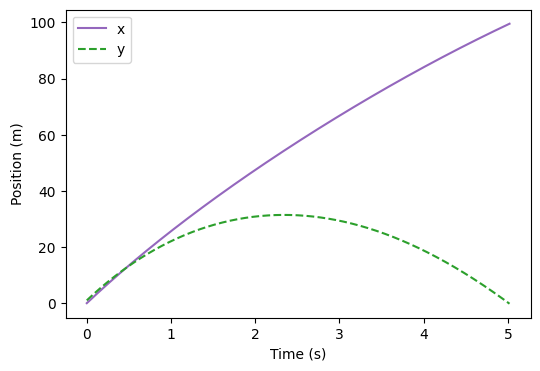

In [61]:
results.x.plot(color='C4',legend=True, figsize = [6,4])
results.y.plot(color='C2', style='--',xlabel='Time (s)',
         ylabel='Position (m)',legend=True);

As expected, the $x$ component increases as the ball moves away from home plate. The $y$ position climbs initially and then descends, falling to 0 m near 5.0 s.  Notice that the green line is *not* the trajectory of the ball!

<br>

If we want to see the trajectory, we can plot the $x$ component on the
$x$-axis and the $y$ component on the $y$-axis.  We'll make a short function to do this.  Notice that we're defining the `figsize`, so the scale of the two axes are about the same, which allows us to better visualize the flight of the ball:

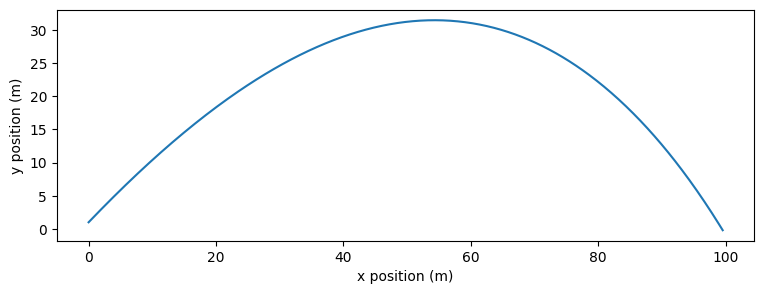

In [63]:
def plot_trajectory(results,label,**options):
    x = results.x.values
    y = results.y.values
    x_vs_y = pd.Series(data=y,index=x)
    x_vs_y.plot(label=label,xlabel='x position (m)',
             ylabel='y position (m)',figsize=[9,3],**options)

plot_trajectory(results,'trajectory')

A trajectory plot can be easier to interpret than a time series plot,
because it shows what the motion of the projectile would look like (at
least from one point of view). Both plots can be useful, but don't get
them mixed up! If you are looking at a time series plot and interpreting it as a trajectory, you will be very confused.

<br>

Notice that the trajectory is not symmetric.
With a launch angle of 45°, the landing angle is closer to vertical, about 57° degrees.

In [65]:
np.rad2deg(np.arctan2(final_state.vy,final_state.vx))

-57.52870769421613

---

<br>

## Exercises

---

<br>

🟨 🟨

### Exercise 1

 Run the simulation with and without air resistance.  How wrong would we be if we ignored drag?

In [ ]:
# Create a new system and state here
# Which parameter can we change to get rid of drag?



In [ ]:
# Run the simulation with the new system



In [ ]:
# Print out the total time, the maximum height, and total distance in the x-direction





Describe the change in time, height and distance here, using actual numbers.  Was ignoring drag a reasonable decision?

✅ ✅  Put your answer here.

---

<br>

🟨 🟨

### Exercise 2

 The baseball stadium in Denver, Colorado is 1,580 meters above sea level, where the density of air is about 1.0 kg / m$^3$.  How much farther would a ball hit with the same initial speed and launch angle travel than the ball at sea level?

In [ ]:
# Create a new system and state here


In [ ]:
# Run the simulation with the new system


In [ ]:
# Print out the total time, the maximum height, and total distance in the x-direction


Describe the change in time, height and distance here, using actual numbers.  Denver's baseball stadium is often called a "hitter's park", and people claim that it is easier to hit a home run there.  Does this simulation support that claim?

✅ ✅  Put your answer here.